In [0]:
!pip install pytesseract
!pip install pillow
!pip install matplotlib
!pip install opencv-python
!apt install tesseract-ocr
!apt install libtesseract-dev

  Created wheel for pytesseract: filename=pytesseract-0.3.4-py2.py3-none-any.whl size=13431 sha256=26e5e9f22c28eae74d0e4937d8cb4e812c4c077818af627ee5f8c50c9f5283bd
  Stored in directory: /root/.cache/pip/wheels/63/2a/a0/7596d2e0a73cf0aeffd6f6170862c4e73f3763b7827e48691a
Successfully built pytesseract
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 29 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http:/

In [0]:
!echo "tessedit_char_whitelist 0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ" > /usr/share/tesseract-ocr/4.00/tessdata/configs/digits

6BYVFZ
驗證碼錯誤!


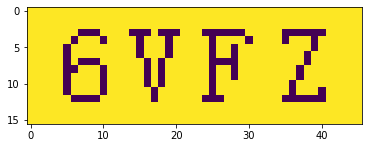

In [0]:
import requests
import cv2
import pytesseract
import numpy as np
from matplotlib.pyplot import imshow

id = 5

s = requests.Session()
r = s.get("https://www.mxeduc.org.tw/Readingscience/verification_bak.asp?id={}".format(id))
pic = s.get("https://www.mxeduc.org.tw/Readingscience/CEZ_Data/VerifyImage.asp", stream=True).raw
nparr = np.asarray(bytearray(pic.read()), np.uint8)
img = cv2.imdecode(nparr, cv2.IMREAD_GRAYSCALE)
img = cv2.copyMakeBorder( img,3,3,3,3, cv2.BORDER_CONSTANT, value=[255, 255, 255])
%matplotlib inline
imshow(np.asarray(img))
code = pytesseract.image_to_string(img, config="digits")
print(code)
r = s.get("https://www.mxeduc.org.tw/Readingscience/vote_bak.asp?id={}&code={}".format(id, code))
r.encoding = "utf.8"
print(r.text)

In [0]:

def voter(id, remaining):
    while True:
        if remaining[id] > 0:
            s = requests.Session()
            r = s.get("https://www.mxeduc.org.tw/Readingscience/verification_bak.asp?id={}".format(id))
            pic = s.get("https://www.mxeduc.org.tw/Readingscience/CEZ_Data/VerifyImage.asp", stream=True).raw
            nparr = np.asarray(bytearray(pic.read()), np.uint8)
            img = cv2.imdecode(nparr, cv2.IMREAD_GRAYSCALE)
            img = cv2.copyMakeBorder(img, 3, 3, 3, 3,cv2.BORDER_CONSTANT, value=[255, 255, 255])
            code = pytesseract.image_to_string(img, config="digits")
            r = s.get("https://www.mxeduc.org.tw/Readingscience/vote_bak.asp?id={}&code={}".format(id, code))
            r.encoding = "utf.8"
            print(r.text)
            if r.text == "投票成功!!":
                remaining[id] -= 1
                print(remaining[id], end="\r")
            
    
rem = {}
rem[2] = 10
voter(2, rem)

驗證碼錯誤!
投票成功!!
投票成功!!
驗證碼錯誤!
驗證碼錯誤!
驗證碼錯誤!
驗證碼錯誤!
投票成功!!
驗證碼錯誤!
驗證碼錯誤!
驗證碼錯誤!
驗證碼錯誤!
驗證碼錯誤!
投票成功!!
驗證碼錯誤!
驗證碼錯誤!


KeyboardInterrupt: ignored